# Missile Guidance Simulation
2D/3D Biased Proportional Navigation Guidance Law is implemented.

In 2D, lateral acceleration command is given as follows:

$\displaystyle a_{cmd} = NV\dot{\lambda} - \frac{K_{r}\left(r\right)K_{\eta}\left(\eta\right)}{r}e_{\gamma_{f}}$

In [31]:
include("main_missiles.jl")

main (generic function with 1 method)

In [40]:
include("sim_missiles.jl")

sim_plot (generic function with 1 method)

  0.166489 seconds (1.16 M allocations: 84.124 MiB)


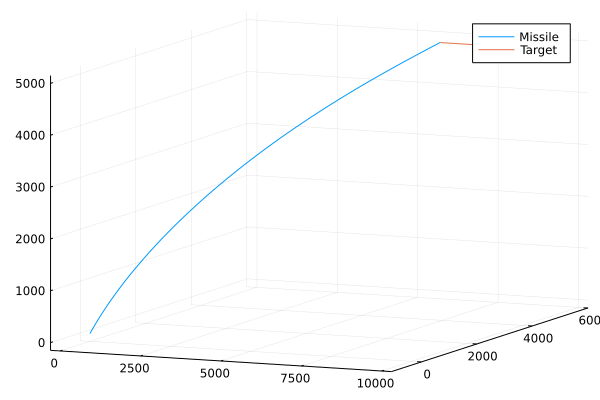

In [44]:
sim_plot(N,3, α, deg2rad(100), χ_f_d, σ_M_lim, s_Bias)